<a href="https://colab.research.google.com/github/ghdakrk/computr_vision/blob/main/2_contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from skimage.data import horse
img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw
img = img_raw.copy().astype('uint8')
contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [2]:
len(contours)

2

In [3]:
contours[0].shape

(312, 1, 2)

In [4]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

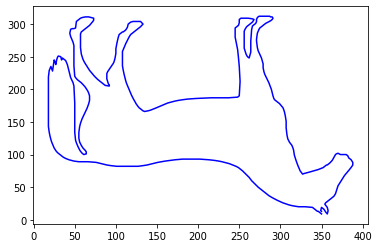

In [5]:
import matplotlib.pyplot as plt

x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c='b')
plt.show()

In [6]:
hierachy

array([[[-1, -1,  1, -1],
        [-1, -1, -1,  0]]], dtype=int32)

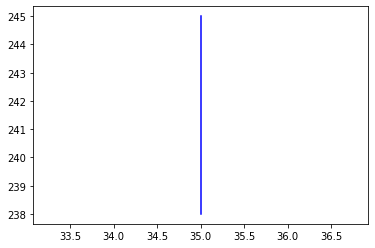

In [7]:
import matplotlib.pyplot as plt

x1, y1 = zip(*np.squeeze(contours[1]))
plt.plot(x1, y1, c='b')
plt.show()

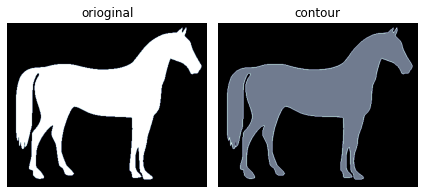

In [8]:
image = cv2.drawContours(img, contours, 0, 2)
plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("orioginal")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("contour")
plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# 모멘트 값

In [10]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm01': 6115675.833333333,
 'm02': 1041817606.0,
 'm03': 200904428563.85,
 'm10': 7943000.166666666,
 'm11': 1043128904.8333333,
 'm12': 169430720481.3,
 'm20': 1914995009.1666665,
 'm21': 233874687443.69998,
 'm30': 517465951777.85004,
 'mu02': 158769774.61250484,
 'mu03': 4625649126.278534,
 'mu11': -103767899.87557864,
 'mu12': 4020833974.2852783,
 'mu20': 425412866.6175771,
 'mu21': -3713125246.697487,
 'mu30': -1219318387.8395386,
 'nu02': 0.08850309451896964,
 'nu03': 0.012528843128440374,
 'nu11': -0.0578433790256196,
 'nu12': 0.010890665663146169,
 'nu20': 0.2371380524771235,
 'nu21': -0.010057218449154588,
 'nu30': -0.003302595676372647}

In [11]:
cv2.contourArea(c0)

42355.0

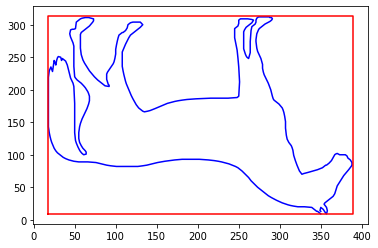

In [12]:
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

plt.plot(x0, y0, c="b")
plt.plot(
 [x, x + w, x + w, x, x], 
 [y, y, y + h, y + h, y],
 c="r"
)
plt.show()

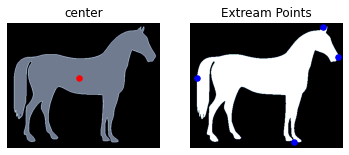

In [13]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])
plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("center")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)
plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
 [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
 [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
 c="b", s=30)
plt.title("Extream Points")
plt.show()

In [75]:
img_raw = cv2.imread("./receipt.png")
img_raw = cv2.cvtColor(img_raw, cv2.COLOR_RGB2GRAY)

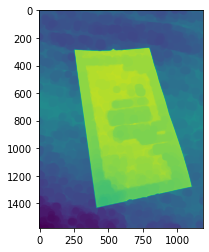

In [76]:
closing = cv2.morphologyEx(img_raw, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50)))
plt.imshow(closing)

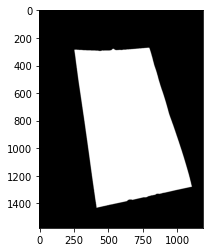

In [124]:
_, thresh1 = cv2.threshold(closing, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap=plt.cm.gray)

In [129]:
img = np.ones(thresh1.shape) - thresh1

img2 = img.copy().astype('uint8')
contours, hierachy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [130]:
len(contours)

1

In [131]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 676274.0,
 'm01': 572662874.1666666,
 'm02': 549235614392.1666,
 'm03': 572344042312987.4,
 'm10': 435326520.6666666,
 'm11': 379615699263.5833,
 'm12': 370770995494968.25,
 'm20': 305117012805.3333,
 'm21': 273107228657819.28,
 'm30': 229191531509499.8,
 'mu02': 64309730136.92767,
 'mu03': -1657671972501.25,
 'mu11': 10985031034.510315,
 'mu12': -1383290977121.914,
 'mu20': 24891572235.762756,
 'mu21': 594406651373.3047,
 'mu30': 737605066389.875,
 'nu02': 0.14061488803805983,
 'nu03': -0.00440749539680215,
 'nu11': 0.02401905443738307,
 'nu12': -0.0036779584352284673,
 'nu20': 0.05442606640660167,
 'nu21': 0.0015804360713195596,
 'nu30': 0.001961178682333586}

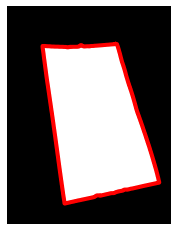

In [132]:
x0, y0 = zip(*np.squeeze(c0))
plt.imshow(img2, cmap=plt.cm.gray)
plt.plot(x0, y0, c="r", lw=4)
plt.axis("off")
plt.show()

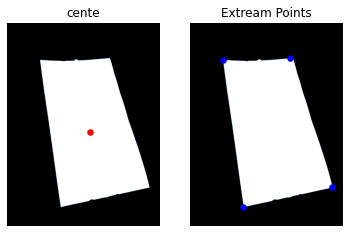

In [133]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])
plt.subplot(1,2,1)
plt.imshow(img2, cmap='bone')
plt.title("cente")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)
plt.subplot(1,2,2)
plt.imshow(img2, cmap='bone')
plt.axis("off")
plt.scatter(
 [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
 [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
 c="b", s=30)
plt.title("Extream Points")
plt.show()

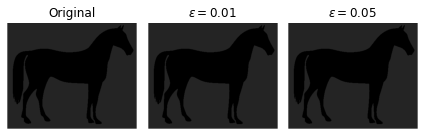

In [140]:
img = horse().astype('uint8')

img1 = img.copy().astype('uint8')
img2 = img.copy().astype('uint8')
img3 = img.copy().astype('uint8')
contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
c0 = contours[0]

epsilon1 = 0.01*cv2.arcLength(c0, True)
epsilon2 = 0.05*cv2.arcLength(c0, True)
approx1 = cv2.approxPolyDP(c0, epsilon1, True)
approx2 = cv2.approxPolyDP(c0, epsilon2, True)
image1 = cv2.drawContours(img1, [c0], -1, 7) #
image2 = cv2.drawContours(img2, [approx1], -1, 7)
image3 = cv2.drawContours(img3, [approx2], -1, 7)
titles = ['Original', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1, image2, image3]
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()